In [1]:
import numpy as np
import pandas as pd
import nlpaug.augmenter.word as naw

In [6]:
# Loading data
df = pd.read_csv('balanced_augmented_Newdataset.csv')
print(df.shape)

(602, 4)


In [7]:
df.head(3)

,VoiceClip_No,TextTranscript,label,processed_content
0,Voice52,the experience was your agent responded positi...,Non,the experience was your agent responded positi...
1,Voice38,get not working all,Non,get not working all
2,Voice199,can know the current price the fiber connection,Non,can know the current price the fiber connection


In [8]:
pip install scikit-learn

In [11]:
x = df['TextTranscript']
y = df['label']

In [12]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Classification Report for Random Forest on Testing Data:
              precision    recall  f1-score   support

         Agg       1.00      0.97      0.98        63
         Non       0.97      1.00      0.98        58

    accuracy                           0.98       121
   macro avg       0.98      0.98      0.98       121
weighted avg       0.98      0.98      0.98       121



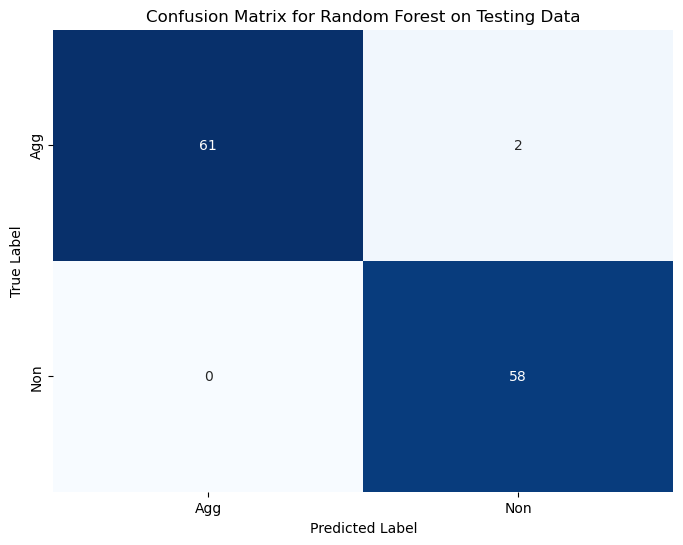

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Assuming df is your DataFrame with 'Comments(x)' and 'Label(y)' columns

# Split the data into training and testing sets     20% - testing and 80% -traning
X_train, X_test, y_train, y_test = train_test_split(df['TextTranscript'], df['label'], test_size=0.2, random_state=42)

# TF-IDF Vectorization (converts the text data(comments) into numerical features)
vectorizer = TfidfVectorizer(max_features=10000)  # Adjust max_features as needed
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Hyperparameter grid to search
#Grid search explores all possible combinations of these hyperparameters to find the optimal set
param_grid_rf = {
    'n_estimators': [100, 200, 300], # no of tress
    'max_depth': [None, 10, 20],  # maximum depth of trees
    'min_samples_split': [2, 5],  # minimum samples required to split a node
    'min_samples_leaf': [1, 2]    # minimum samples required at a leaf node
}

# Grid search with cross-validation on the training data to find the best hyperparameters for random forest
rf_classifier = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=3)
grid_search_rf.fit(X_train_tfidf, y_train)

# Best hyperparameters from the grid search
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters for Random Forest:", best_params_rf)

# Train the final Random Forest model with the best hyperparameters
final_rf_classifier = RandomForestClassifier(**best_params_rf, random_state=42)
final_rf_classifier.fit(X_train_tfidf, y_train)

# Predict class lab on the testing dataset
y_pred_rf = final_rf_classifier.predict(X_test_tfidf)

# Evaluate the final Random Forest model on the testing dataset
report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report for Random Forest on Testing Data:")
print(report_rf)




# Predict class labels on the testing dataset
y_pred_rf = final_rf_classifier.predict(X_test_tfidf)

# Compute the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=final_rf_classifier.classes_, 
            yticklabels=final_rf_classifier.classes_)
plt.title('Confusion Matrix for Random Forest on Testing Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

